# SkAI - AlexNet and ResNet

## Prepare Train and Test Images

In [1]:
from prepare_images import prepare_images
prepare_images()

## Prepare DataLoaders

In [1]:
from prepare_data_loaders import prepare_data_loaders
dataloaders = prepare_data_loaders()

## AlexNet Model

In [2]:
from initialize_model import initialize_model
from train_model import train_model
import torch
from torch import nn
from torch import optim
from config import ALEXNET_EPOCHS

model = initialize_model('alexnet', True, True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Send the model to GPU
model = model.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model.parameters()
print("Params to learn:")
feature_extract = True
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)


trained_model, train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_model(model, dataloaders, criterion, optimizer, ALEXNET_EPOCHS, False)

/Users/JohnnyLiu/.local/share/virtualenvs/SkAI-7q77jleT/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/JohnnyLiu/.local/share/virtualenvs/SkAI-7q77jleT/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Params to learn:
	 classifier.fc1.weight
	 classifier.fc1.bias
	 classifier.fc2.weight
	 classifier.fc2.bias
Epoch 0/1
----------
train Loss: 1.2024 Acc: 0.3808
val Loss: 1.0279 Acc: 0.5385

Epoch 1/1
----------
train Loss: 0.9510 Acc: 0.5504
val Loss: 0.7644 Acc: 0.6859

Training complete in 1m 28s
Best val Acc: 0.685897


## ResNet

In [3]:
from initialize_model import initialize_model
from train_model import train_model
import torch
from torch import nn
from torch import optim
from config import RESNET_EPOCHS

model = initialize_model('resnet', True, True)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model = model.cuda() if device else model

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Send the model to GPU
model = model.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model.parameters()
print("Params to learn:")
feature_extract = True
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)


trained_model, train_loss_history, val_loss_history, train_acc_history, val_acc_history = train_model(model, dataloaders, criterion, optimizer, RESNET_EPOCHS, False)

Params to learn:
	 fc.weight
	 fc.bias
Epoch 0/1
----------
train Loss: 1.0880 Acc: 0.3896
val Loss: 1.0684 Acc: 0.4359

Epoch 1/1
----------
train Loss: 1.0603 Acc: 0.4344
val Loss: 1.0365 Acc: 0.4423

Training complete in 5m 8s
Best val Acc: 0.442308


### 1.7. Draw learning curves

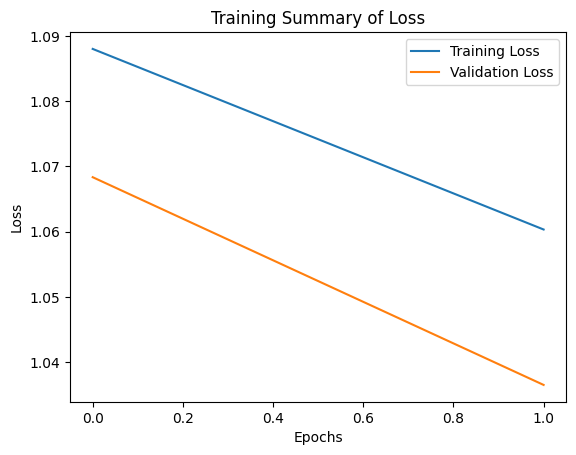

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Training Summary of Loss")
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

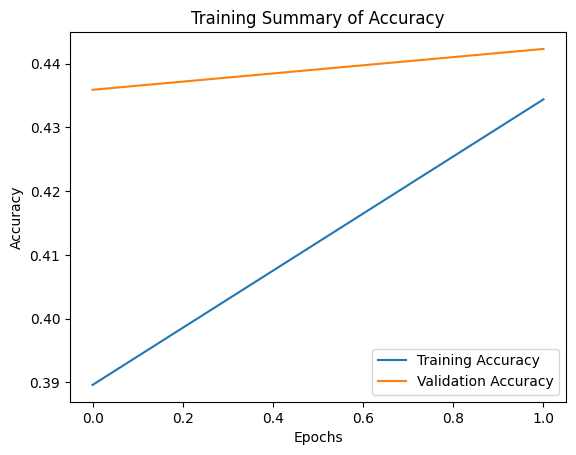

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Training Summary of Accuracy")
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.8. Predict on the test data with the best model so far

In [ ]:
# Predict on the test data
from itertools import chain

# Load the best model so far
model.load_state_dict(best_model_weights)
test_accuracy = 0

predictions = []
label_data = []

for images, labels in dataloaders['testing']:
    # Move images & labels to the GPU
    images, labels = images.to(device), labels.to(device)
    
    log_ps = model(images)
    ps = torch.exp(log_ps)
    top_ps, top_class = ps.topk(1, dim=1)

    # Save the predictions and labels for the test data
    label_data.extend(labels.cpu().data.numpy().tolist())
    predictions.extend(list(chain.from_iterable(top_class.cpu().data.numpy().tolist())))
    
    matches = (top_class == labels.view(*top_class.shape)).type(torch.FloatTensor)
    test_batch_accuracy = matches.mean()
    
    # Tracking testing metrics
    test_accuracy += test_batch_accuracy.item()  

print('Test Accuracy:', test_accuracy / test_len)

Test Accuracy: 0.701298713684082


confusion matrix
[[4 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 6]]



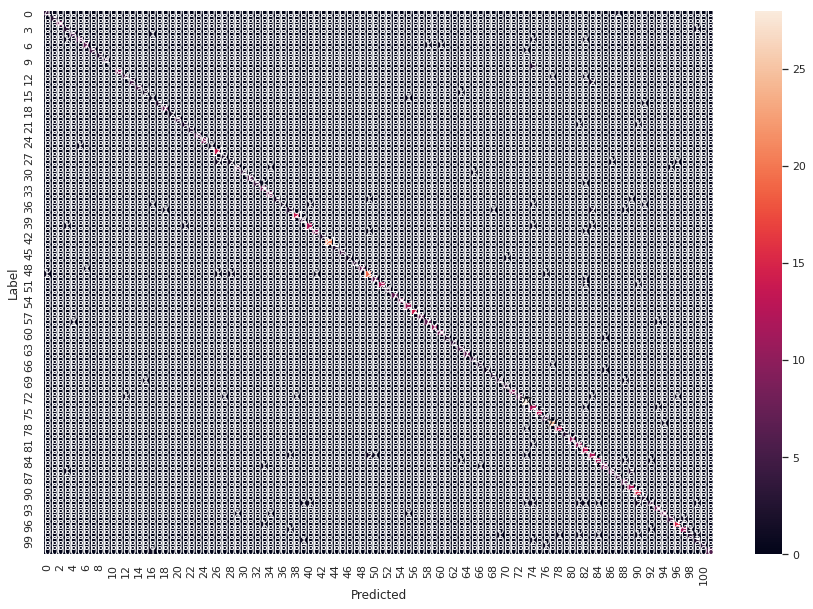

normalized confusion matrix
[[0.8        0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.6        0.         0.        ]
 [0.         0.         0.         ... 0.         0.75       0.        ]
 [0.         0.         0.         ... 0.         0.         0.85714286]]


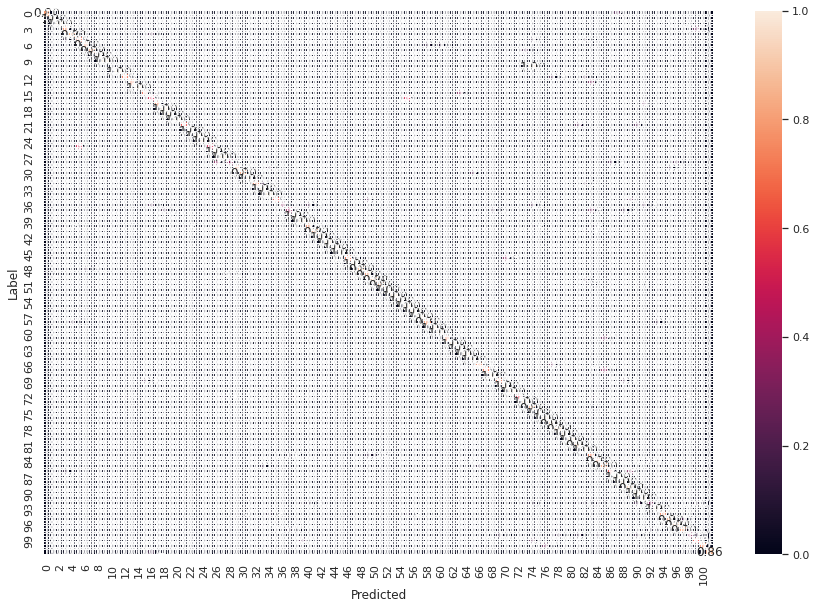

In [ ]:
# Please plot the confusion matrix other than print() if possible
from sklearn.metrics import confusion_matrix as conf_mat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Get the confusion matrix
cf = conf_mat(label_data,predictions)
print('confusion matrix')
print(cf)
print()

# Plot the original confusion matrix
df_cf = pd.DataFrame(cf, range(len(class_to_idx)), range(len(class_to_idx)))
plt.figure(figsize=(15,10))
sn.heatmap(df_cf, annot=True)
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.show()

# Normalize confusion matrix
print('normalized confusion matrix')
ncf = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
print(ncf)

# Plot the normalized confusion matrix
plt.figure(figsize=(15,10))
sn.heatmap(ncf, annot=True, fmt='.2f')
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.show()